In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [48]:
X = np.random.rand(100, 4)
y = np.random.randint(0, 2, 100)

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X, y)

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X, y)

QuadraticDiscriminantAnalysis(store_covariance=True)

### LDA

In [49]:
print([attr for attr in dir(lda) if not attr.startswith('_')])

['classes_', 'coef_', 'covariance_', 'covariance_estimator', 'decision_function', 'explained_variance_ratio_', 'fit', 'fit_transform', 'get_feature_names_out', 'get_metadata_routing', 'get_params', 'intercept_', 'means_', 'n_components', 'n_features_in_', 'predict', 'predict_log_proba', 'predict_proba', 'priors', 'priors_', 'scalings_', 'score', 'set_output', 'set_params', 'set_score_request', 'shrinkage', 'solver', 'store_covariance', 'tol', 'transform', 'xbar_']


In [50]:
lda.means_

array([[0.45665825, 0.41255432, 0.48444988, 0.43974573],
       [0.52322507, 0.50932804, 0.45156382, 0.5443533 ]])

In [51]:
lda.covariance_

array([[ 0.06778041, -0.00408445, -0.00047976,  0.00496197],
       [-0.00408445,  0.07995674,  0.00697991, -0.00328443],
       [-0.00047976,  0.00697991,  0.07036281, -0.00097075],
       [ 0.00496197, -0.00328443, -0.00097075,  0.09208292]])

In [52]:
X_test = np.random.rand(3, 4)
X_test

array([[0.54034417, 0.5683831 , 0.91289027, 0.72631974],
       [0.76518175, 0.18484166, 0.62843229, 0.47042843],
       [0.5791    , 0.80373243, 0.11249987, 0.64183545]])

In [53]:
lda.predict_proba(X_test)

array([[0.4312249 , 0.5687751 ],
       [0.53457876, 0.46542124],
       [0.27119325, 0.72880675]])

In [54]:
lda.coef_

array([[ 0.95781889,  1.3299645 , -0.56821192,  1.10312895]])

### QDA

In [55]:
print([attr for attr in dir(qda) if not attr.startswith('_')])

['classes_', 'covariance_', 'decision_function', 'fit', 'get_metadata_routing', 'get_params', 'means_', 'n_features_in_', 'predict', 'predict_log_proba', 'predict_proba', 'priors', 'priors_', 'reg_param', 'rotations_', 'scalings_', 'score', 'set_params', 'set_score_request', 'store_covariance', 'tol']


In [56]:
qda.means_

array([[0.45665825, 0.41255432, 0.48444988, 0.43974573],
       [0.52322507, 0.50932804, 0.45156382, 0.5443533 ]])

In [57]:
qda.covariance_

[array([[ 0.06446058,  0.00056755, -0.00247353,  0.01390149],
        [ 0.00056755,  0.09805197,  0.02063924,  0.00815609],
        [-0.00247353,  0.02063924,  0.07782109,  0.00431507],
        [ 0.01390149,  0.00815609,  0.00431507,  0.08731994]]),
 array([[ 0.07349792, -0.00853176,  0.00133882, -0.00308183],
        [-0.00853176,  0.0664163 , -0.00533437, -0.01395644],
        [ 0.00133882, -0.00533437,  0.06624881, -0.00588005],
        [-0.00308183, -0.01395644, -0.00588005,  0.10008342]])]

In [58]:
qda.predict_proba(X_test)

array([[0.54699266, 0.45300734],
       [0.45161751, 0.54838249],
       [0.25633237, 0.74366763]])

### REAL CASE

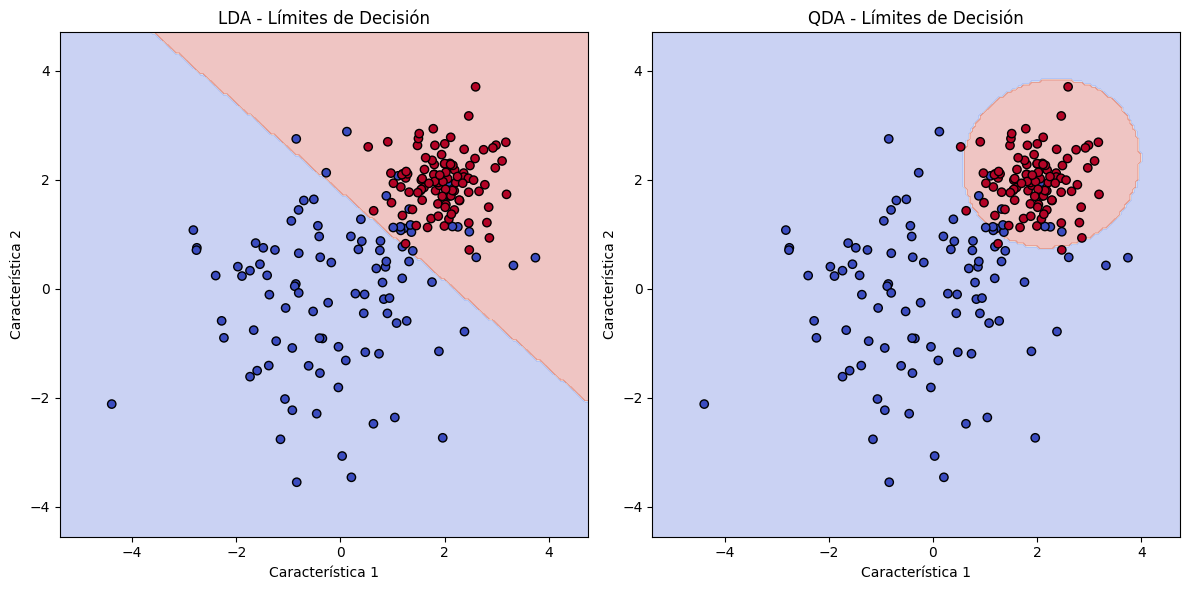

In [ ]:
# Crear dos nubes de puntos
X1 = np.random.multivariate_normal([0, 0], [[2, 0], [0, 2]], 100)
X2 = np.random.multivariate_normal([2, 2], [[0.3, 0], [0, 0.3]], 100)
X = np.vstack([X1, X2])

y = np.hstack([np.zeros(100), np.ones(100)])

# Entrenar modelos
lda.fit(X, y)
qda.fit(X, y)

# Crear cuadrícula de puntos
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predicciones en la cuadrícula
lda_pred = lda.predict(grid).reshape(xx.shape)
qda_pred = qda.predict(grid).reshape(xx.shape)

# Graficar límites de decisión LDA
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, lda_pred, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("LDA - Límites de Decisión")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")

# Graficar límites de decisión QDA
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, qda_pred, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("QDA - Límites de Decisión")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")

plt.tight_layout()
plt.show()


In [72]:
lda.means_

array([[-0.01502393, -0.0311868 ],
       [ 1.96382906,  1.9829586 ]])

In [73]:
qda.means_

array([[-0.01502393, -0.0311868 ],
       [ 1.96382906,  1.9829586 ]])

In [69]:
lda.covariance_

array([[1.18891731, 0.18037755],
       [0.18037755, 1.02044112]])

In [70]:
qda.covariance_

[array([[2.08727487, 0.34309656],
        [0.34309656, 1.80012234]]),
 array([[0.31457828, 0.02130254],
        [0.02130254, 0.26137487]])]

Means are the same. Covariances are different: while LDA uses the same for both classes, QDA has a different one for each class. This allows more flexibility, drawing a quadratic decision function. This can also cause overfitting.

In [75]:
lda.coef_

array([[1.38854793, 1.70861507]])

coef_ is the weight vector, the direction that maximizes the separation between both classes. This could be important to calculate local and global contributions.